# Normalized thrust and power coefficients as a function of misalignment $\gamma$, shear $\kappa$ and pitch $\theta$

 This is an interactive version of Figure 5 found in Tamaro et al (in review). If you are not interested in the code, you may skip this first section and simply adjust the parameters in the [Variables](#set_vars) section to your needs. Once you are done, rerun the section to generate the new plot.

## Code

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt  
plt.close("all")
#%%
colors = np.array([[0,0,0],[0.4,0.4,0.4],[0.7,0.7,0.7]])
style  = np.array(["-",":"])

Define function to compute $C_T$

In [2]:
def find_ct(x,*data):
    sigma,cd,cl_alfa,gamma,delta,k,cosMu,sinMu,tsr,theta,mu = data
    CD = np.cos(np.deg2rad(delta))
    CG = np.cos(np.deg2rad(gamma))
    SD = np.sin(np.deg2rad(delta))
    SG = np.sin(np.deg2rad(gamma))
    a = (1- ( (1+np.sqrt(1-x-1/16*x**2*sinMu**2))/(2*(1+1/16*x*sinMu**2))) )    
    k_1s = -1*(15*np.pi/32*np.tan((mu+np.sin(mu)*(x/2))/2));
    I1 = -(np.pi*cosMu*(tsr - CD*SG*k)*(a - 1) 
           + (CD*CG*cosMu*k_1s*SD*a*k*np.pi*(2*tsr - CD*SG*k))/(8*sinMu))/(2*np.pi)
    I2 = (np.pi*sinMu**2 + (np.pi*(CD**2*CG**2*SD**2*k**2 
                                   + 3*CD**2*SG**2*k**2 - 8*CD*tsr*SG*k 
                                   + 8*tsr**2))/12)/(2*np.pi)
    return (sigma*(cd+cl_alfa)*(I1) - sigma*cl_alfa*theta*(I2)) - x

Define function to compute $C_P$

In [3]:
def find_cp(sigma,cd,cl_alfa,gamma,delta,k,cosMu,sinMu,tsr,theta,ct,mu):
    a = 1-((1+np.sqrt(1-ct-1/16*sinMu**2*ct**2))/(2*(1+1/16*ct*sinMu**2)))
    SG = np.sin(np.deg2rad(gamma))
    CG = np.cos(np.deg2rad(gamma))                
    SD = np.sin(np.deg2rad(delta))  
    CD = np.cos(np.deg2rad(delta))  
    k_1s = -1*(15*np.pi/32*np.tan((mu+np.sin(mu)*(ct/2))/2));
    
    cp = sigma*((np.pi*cosMu**2*tsr*cl_alfa*(a - 1)**2 
                 - (tsr*cd*np.pi*(CD**2*CG**2*SD**2*k**2 + 3*CD**2*SG**2*k**2 - 8*CD*tsr*SG*k + 8*tsr**2))/16 
                 - (np.pi*tsr*sinMu**2*cd)/2 - (2*np.pi*cosMu*tsr**2*cl_alfa*theta)/3 
                 + (np.pi*cosMu**2*k_1s**2*tsr*a**2*cl_alfa)/4 
                 + (2*np.pi*cosMu*tsr**2*a*cl_alfa*theta)/3 + (2*np.pi*CD*cosMu*tsr*SG*cl_alfa*k*theta)/3 
                 + (CD**2*cosMu**2*tsr*cl_alfa*k**2*np.pi*(a - 1)**2*(CG**2*SD**2 + SG**2))/(4*sinMu**2) 
                 - (2*np.pi*CD*cosMu*tsr*SG*a*cl_alfa*k*theta)/3 
                 + (CD**2*cosMu**2*k_1s**2*tsr*a**2*cl_alfa*k**2*np.pi*(3*CG**2*SD**2 + SG**2))/(24*sinMu**2) 
                 - (np.pi*CD*CG*cosMu**2*k_1s*tsr*SD*a*cl_alfa*k)/sinMu 
                 + (np.pi*CD*CG*cosMu**2*k_1s*tsr*SD*a**2*cl_alfa*k)/sinMu 
                 + (np.pi*CD*CG*cosMu*k_1s*tsr**2*SD*a*cl_alfa*k*theta)/(5*sinMu) 
                 - (np.pi*CD**2*CG*cosMu*k_1s*tsr*SD*SG*a*cl_alfa*k**2*theta)/(10*sinMu))/(2*np.pi))
    
    return cp

Define a function to solve for $C_T$ and return the plot

In [4]:
def solve_and_plot(sigma, cd, c_l_alpha, beta, gamma_array, delta, tsr, theta_arr, k_arr):
    x0   = 0.6
    idx0 = np.where(gamma_array==0)
    c     = 0                                        # counter
    min_y_cp = 1
    min_y_ct = 1
    plt.figure(figsize=(7, 3.0), dpi=120)
    for k in k_arr:
        cc = 0
        for theta_p in theta_arr:
            ct_array    = np.zeros(np.size(gamma_array))
            cp_array    = np.zeros(np.size(gamma_array))
            theta = theta_p + np.deg2rad(beta)
            ccc  = 0
            for gamma in gamma_array:
              # define total misalignment angle mu               
              mu = np.arccos(np.cos(np.deg2rad(gamma))*np.cos(np.deg2rad(delta)))
              data = (sigma,cd,c_l_alpha,gamma,delta,k,np.cos(mu),np.sin(mu),tsr,theta,mu)
              ct = fsolve(find_ct, x0,args=data)
              ct_array[ccc] = ct[0]
              # get C_P
              cp = find_cp(sigma,cd,c_l_alpha,gamma,delta,k,np.cos(mu),np.sin(mu),tsr,theta,ct_array[ccc],mu)
              cp_array[ccc] = cp
              ccc += 1
            plt.subplot(1,2,1)
            if c == 0:
                plt.plot(gamma_array,ct_array/ct_array[idx0],color=colors[cc,:],linestyle=style[c],label=r'$\theta_p=$' + str(np.round(np.rad2deg(theta_p),1)) + '$^\circ$')
            else:
                plt.plot(gamma_array,ct_array/ct_array[idx0],color=colors[cc,:],linestyle=style[c])       
            if np.min(ct_array/ct_array[idx0]) < min_y_ct:
                min_y_ct = np.min(ct_array/ct_array[idx0])
            plt.subplot(1,2,2)
            if cc == 0:
                plt.plot(gamma_array,cp_array/cp_array[idx0],color=colors[cc,:],linestyle=style[c],label=r'$k=$' + str(k))
            else:
                plt.plot(gamma_array,cp_array/cp_array[idx0],color=colors[cc,:],linestyle=style[c])       
            if np.min(cp_array/cp_array[idx0]) < min_y_cp:
                min_y_cp = np.min(cp_array/cp_array[idx0])
                
            cc += 1
        c += 1
    #%% Plot
    plt.subplot(1,2,1)
    plt.ylabel('$C_T/C_{T,0}$ $[-]$',fontsize=14)
    plt.legend(ncol=len(theta_arr),handlelength=1,columnspacing=0.5,frameon=False,bbox_to_anchor = (2,1.35),fontsize=14)
    plt.ylim([np.floor(min_y_ct*10)/10,1.01])
    plt.yticks(np.arange(np.floor(min_y_ct*10)/10,1.01,0.1),fontsize=14)
    plt.subplot(1,2,2)    
    plt.ylabel('$C_P/C_{P,0}$ $[-]$',fontsize=14)
    plt.legend(ncol=1,handlelength=1,columnspacing=0.5,frameon=True,fontsize=14)
    plt.ylim([np.floor(min_y_cp*10)/10,1.01])
    plt.yticks(np.arange(np.floor(min_y_cp*10)/10,1.01,0.1),fontsize=14)

    # letters = np.array(["(a)","(b)"])
    for i in np.arange(2):
        plt.subplot(1,2,i+1)
        plt.xlabel('$\gamma$ [$^\circ$]',fontsize=14)
        plt.xlim([gamma_array[0],gamma_array[-1]])
        plt.xticks(np.round(np.arange(gamma_array[0],gamma_array[-1]+0.1,10),1),fontsize=14)
        plt.grid()
        # plt.text(23.7,0.96,letters[i],fontsize=14)
    plt.subplots_adjust(left=0.12, bottom=0.25, right=0.95, top=0.8, wspace=0.4, hspace=0.3)

<a id='set_vars'></a>
## Variables<br>
Define variables, solve for $C_t$ and return the plot <br>
You may set the variables and rerun the cells below by selecting run in the menu above.

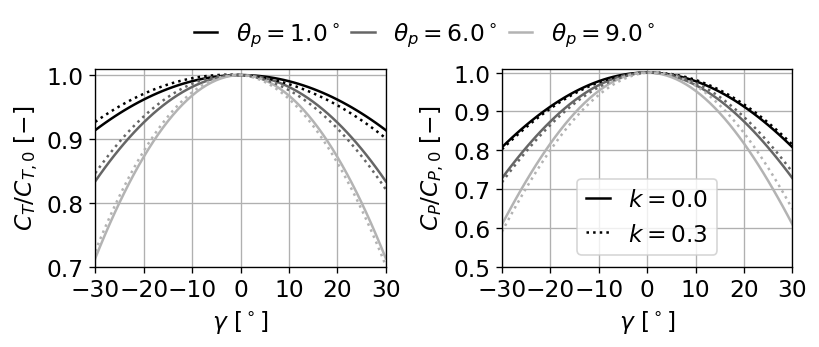

In [5]:
sigma           = 0.0416                        # rotor solidity        [-]
cd              = 0.004                         # drag coefficient      [-]
c_l_alpha       = 4.796                         # lift slope            [1/rad]
beta            = -3.177                        # blade twist angle     [deg]
gamma_array     = np.linspace(-30,30,61)        # rotor yaw angle       [deg]
delta           = -5                            # rotor tilt angle      [deg]
tsr             = 8                             # tip speed ratio       [-]
theta_arr       = np.deg2rad(np.array([1,6,9])) # blade pitch angle     [deg]
k_arr           = np.array([0, 0.3])            # inflow shear (linear) [-]
solve_and_plot(sigma, cd, c_l_alpha, beta, gamma_array, delta, tsr, theta_arr, k_arr)